In [126]:
import pandas as pd
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



df = pd.read_excel(r"D:\AGRICULTURE\anomaly_detection\dataset_combined_final.xlsm", engine='openpyxl')


In [46]:
df1 = df.drop(df.columns[0],axis = 1)

In [54]:
df1.shape

(93, 55)

In [59]:
df1.dropna(inplace = True)


In [64]:
df1.columns

Index(['Tanggal', 'Main steam flow (t/h)',
       'Main steam temperature (boiler side) (℃)',
       'Main steam pressure (boiler side) (Mpa)',
       'Reheat steam temperature (boiler side) (℃)',
       'Superheater desuperheating water flow (t/h)',
       'Reheater desuperheating water flow (t/h)', 'Feedwater temperature (℃)',
       'Feedwater flow (t/h)', 'Flue gas temperature (℃)',
       'Boiler oxygen level (%)', 'Main steam temperature (turbine side) (℃)',
       'Main steam pressure (turbine side) (MPa)',
       'Reheat steam temperature (turbine side) (℃)',
       'Reheat steam pressure (turbine side) (MPa)',
       'Control stage pressure (Mpa)', 'High exhaust pressure (Mpa)',
       'Feedwater pressure (MPa)', 'Condenser vacuum (kPa)',
       'Circulating water outlet temperature (℃)', 'SO2 (mg/m3)',
       'Nox (mg/m3)', 'CO (mg/m3)', 'CO2 (ppm)', 'O2 (%)', 'Velocity (m/s)',
       'Temp. (°C)', 'Pressure (Kpa)', 'Flow rate (KNm3/h)', 'Opacity (%)',
       'Dust (mg/m3)', 

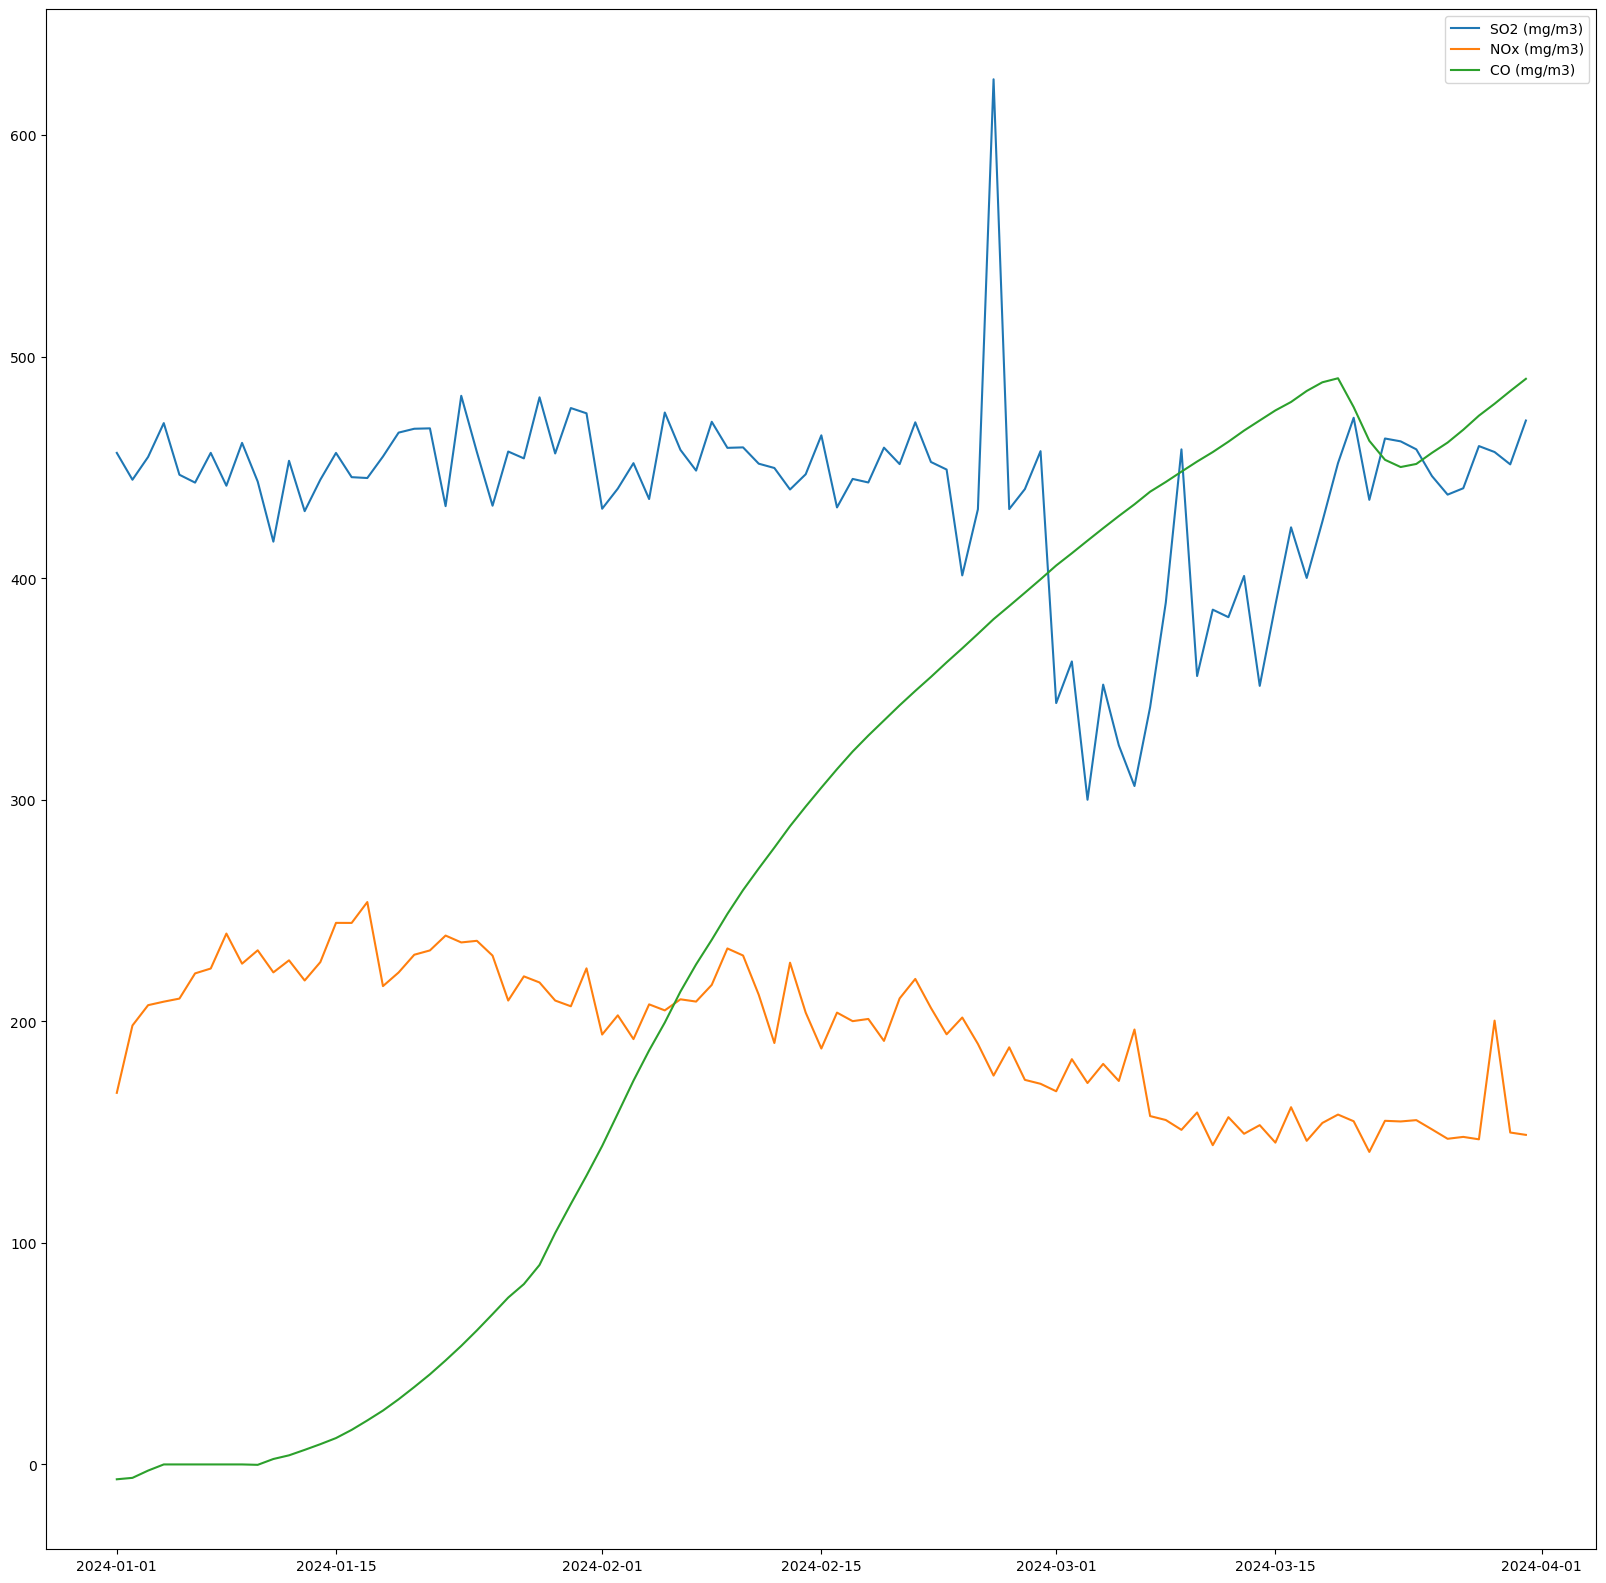

In [79]:
plt.figure(figsize=(20,20))

plt.plot(df1['Tanggal'], df1['SO2 (mg/m3)'], label='SO2 (mg/m3)')
plt.plot(df1['Tanggal'], df1['Nox (mg/m3)'], label='NOx (mg/m3)')
plt.plot(df1['Tanggal'], df1['CO (mg/m3)'], label='CO (mg/m3)')

plt.legend()
plt.show()

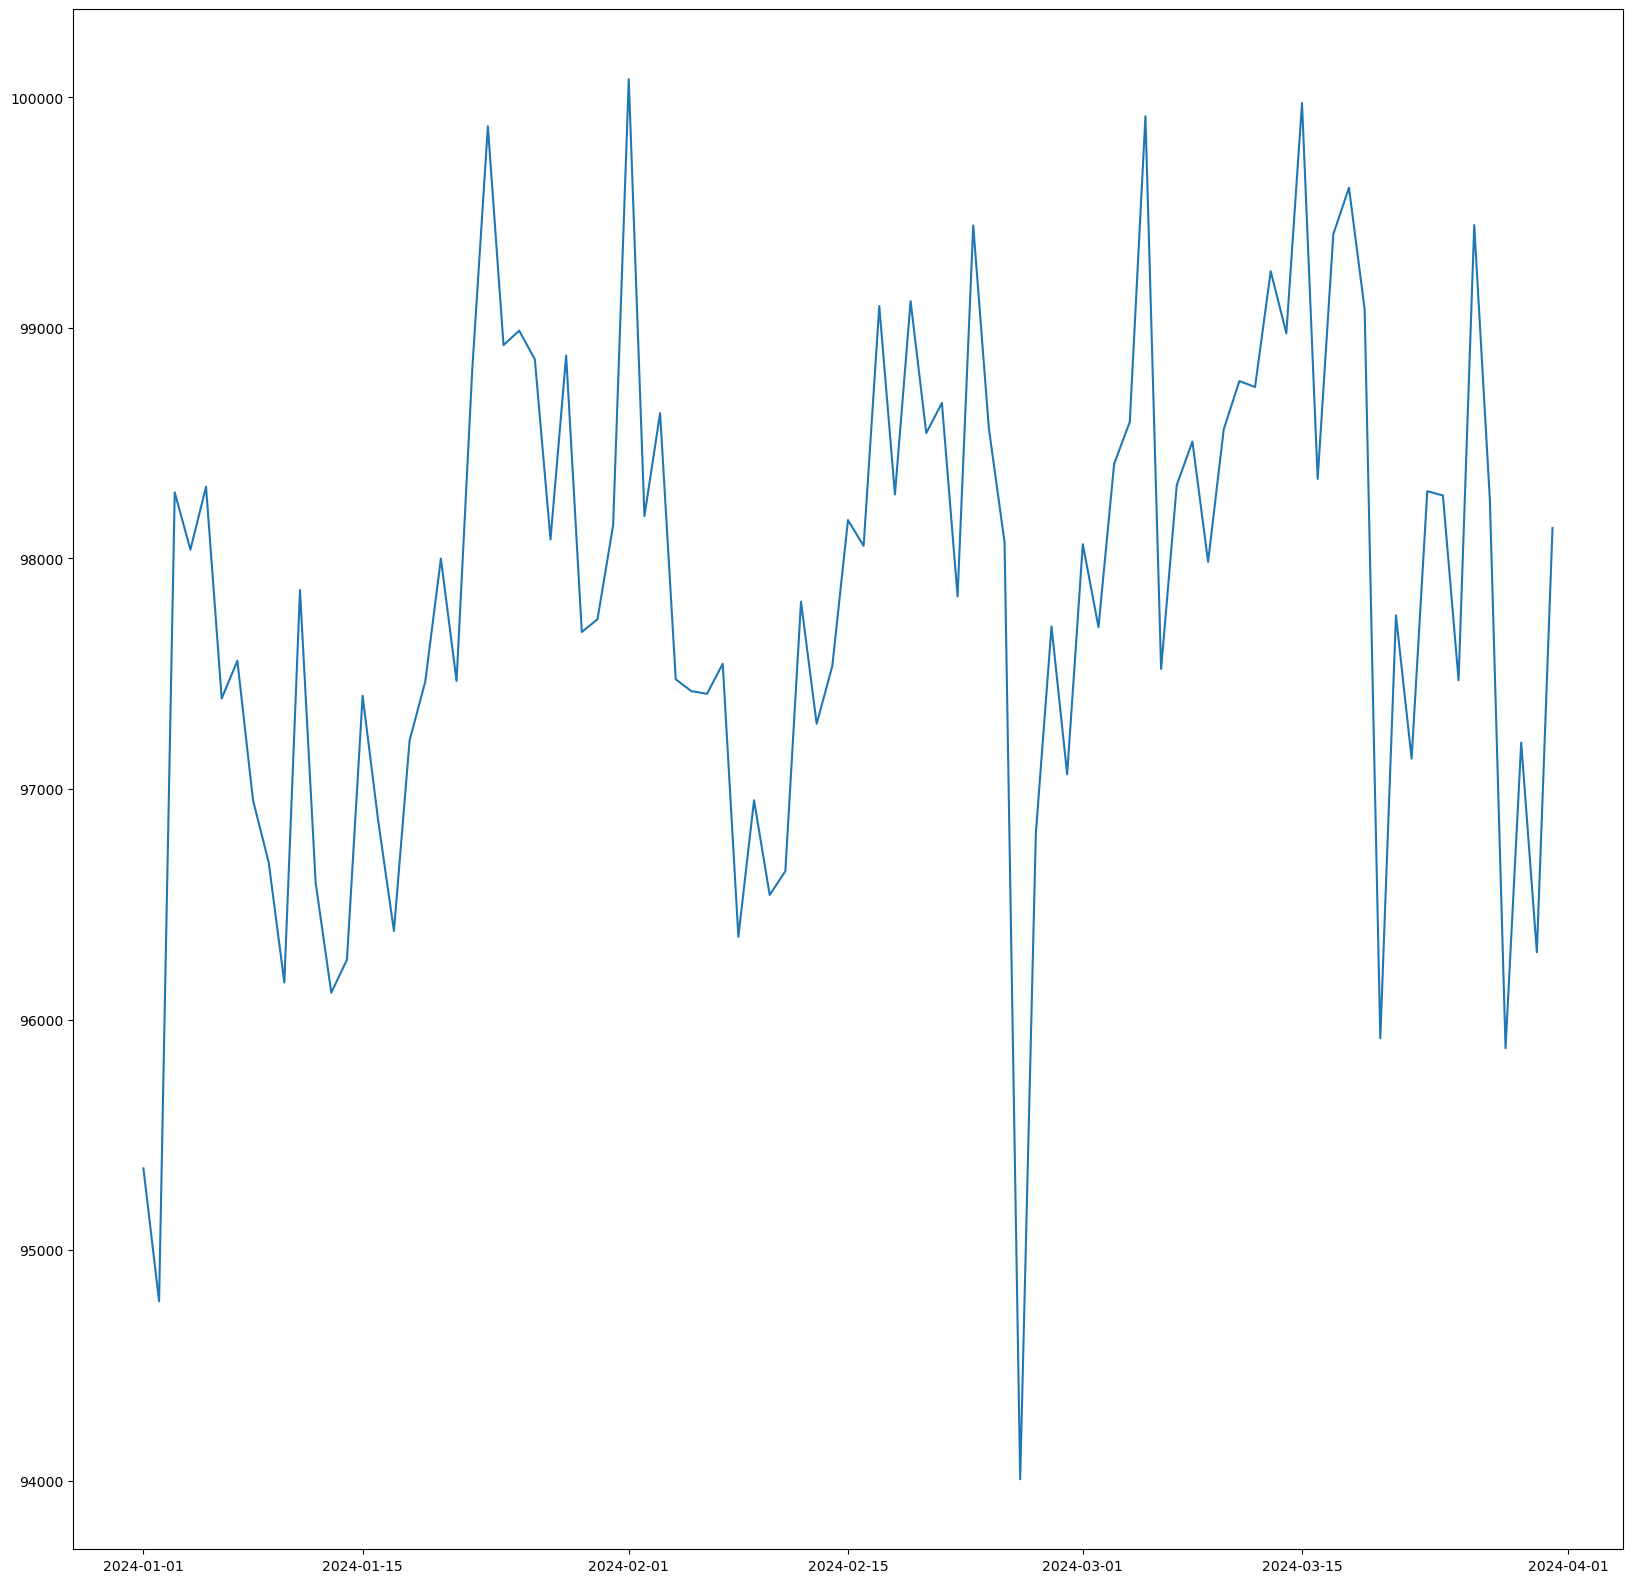

In [80]:
plt.figure(figsize=(20,20))
plt.plot(df1['Tanggal'], df1['CO2 (ppm)'], label='CO2 (ppm)')
plt.show()

<Figure size 1200x600 with 0 Axes>

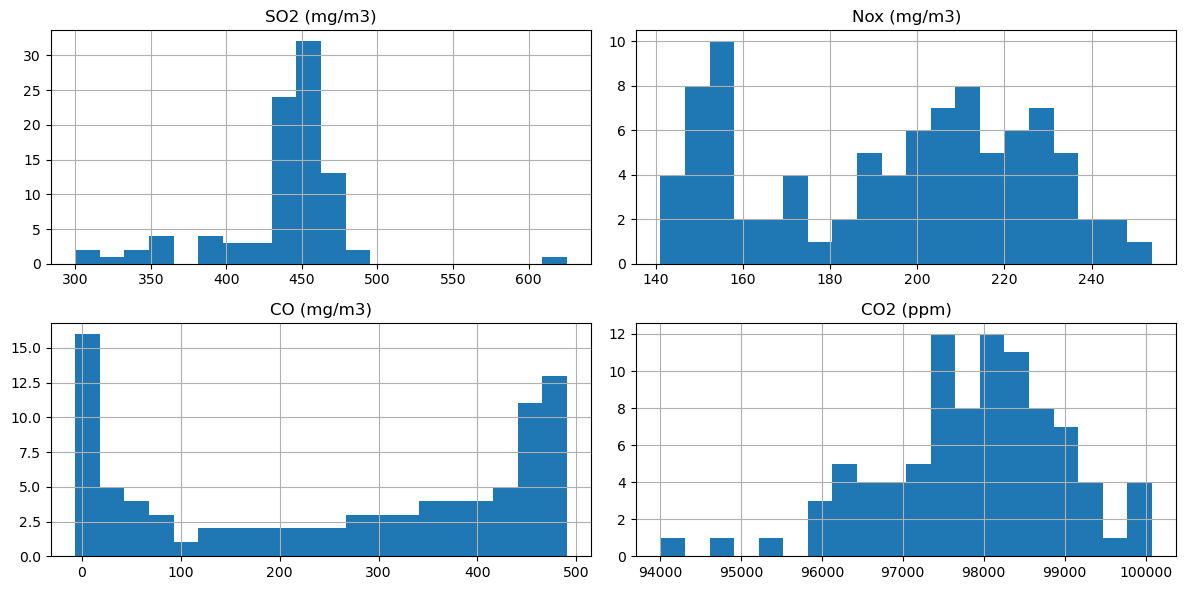

In [204]:
plt.figure(figsize=(12, 6))
df1[['SO2 (mg/m3)', 'Nox (mg/m3)', 'CO (mg/m3)', 'CO2 (ppm)']].hist(bins=20, layout=(2, 2), figsize=(12, 6))
plt.tight_layout()
plt.show()

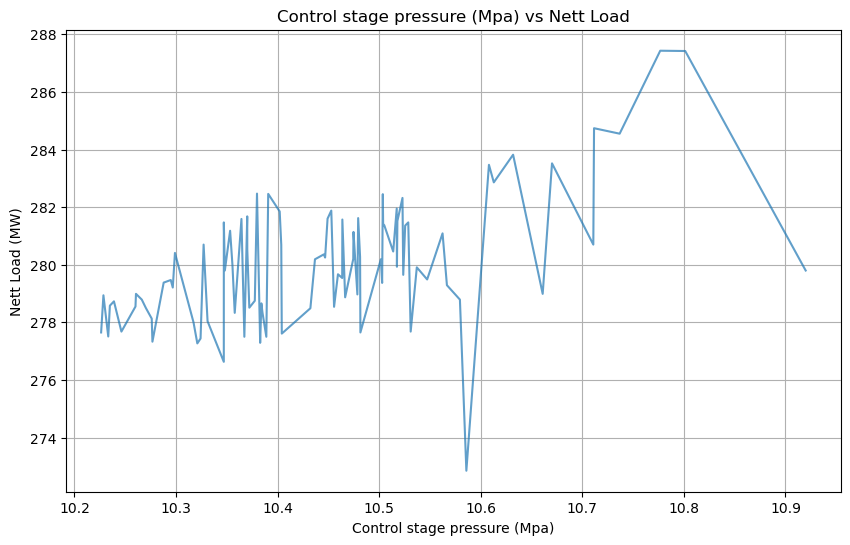

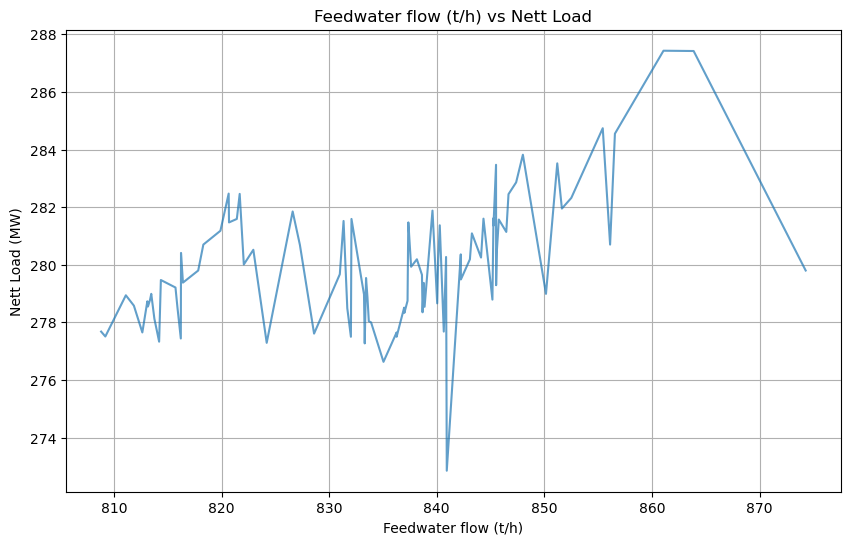

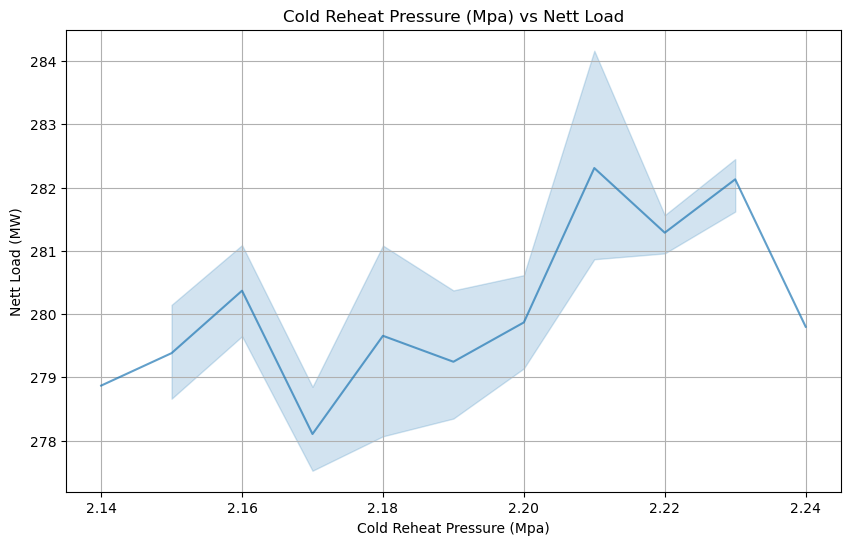

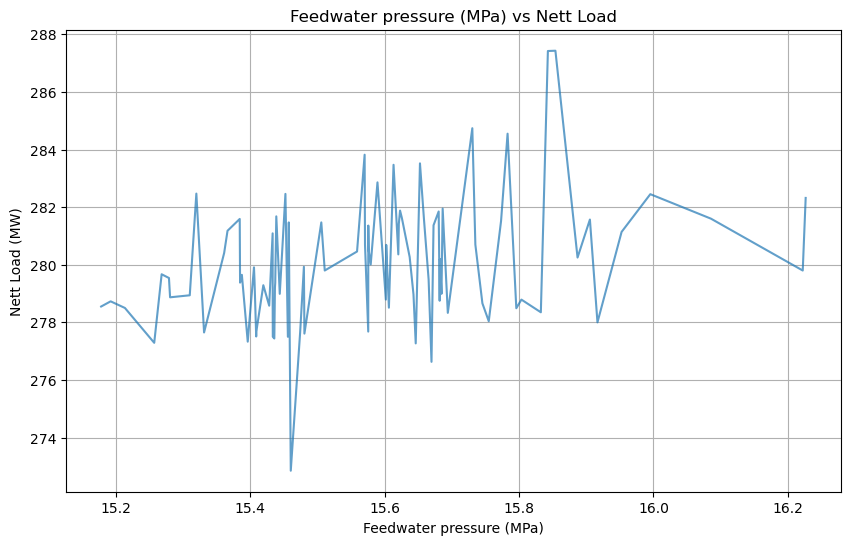

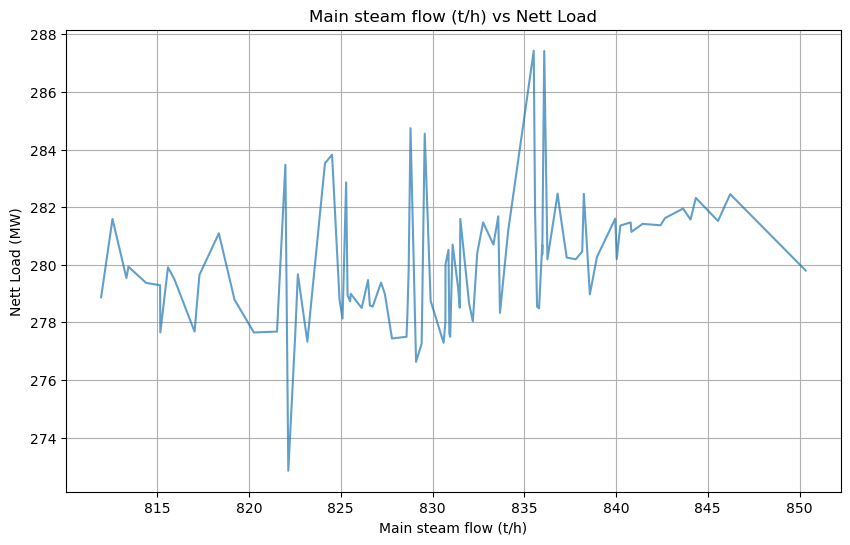

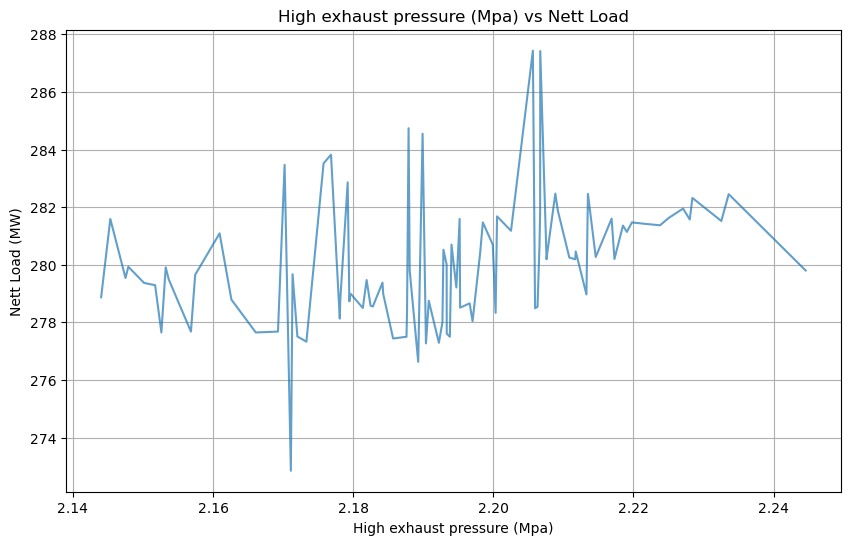

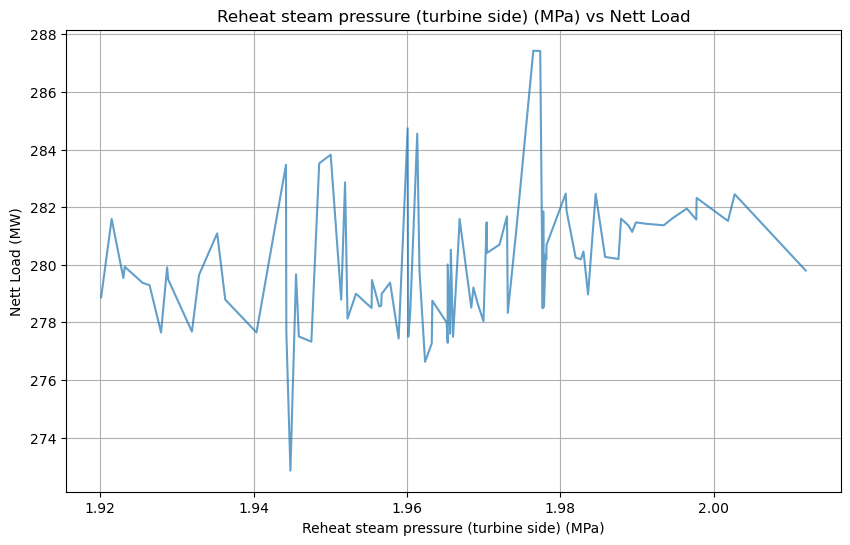

In [200]:

selected_columns = ['Control stage pressure (Mpa)', 'Feedwater flow (t/h)', 
                    'Cold Reheat Pressure (Mpa)', 'Feedwater pressure (MPa)', 
                    'Main steam flow (t/h)', 'High exhaust pressure (Mpa)', 
                    'Reheat steam pressure (turbine side) (MPa)']


for column in selected_columns:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x=column, y='Nett Load (MW)', alpha=0.7)
    plt.title(f'{column} vs Nett Load')
    plt.xlabel(column)
    plt.ylabel('Nett Load (MW)')
    plt.grid(True)
    plt.show()


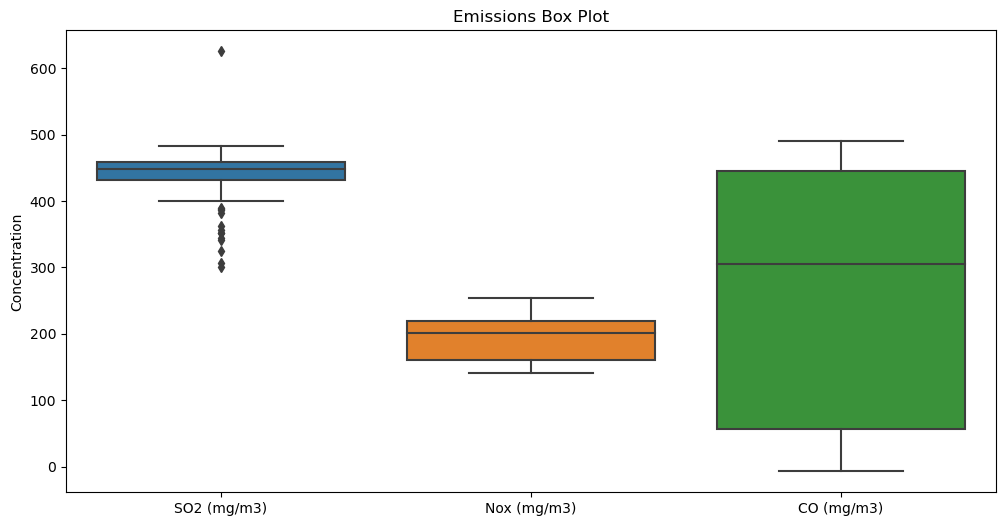

In [83]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1[['SO2 (mg/m3)', 'Nox (mg/m3)', 'CO (mg/m3)']])
plt.title('Emissions Box Plot')
plt.ylabel('Concentration')
plt.show()

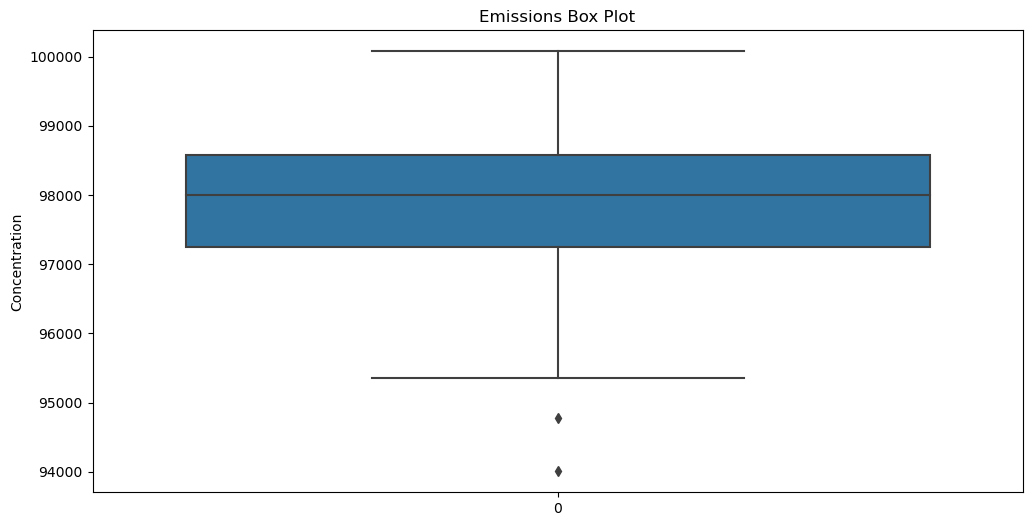

In [85]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1['CO2 (ppm)'])
plt.title('Emissions Box Plot')
plt.ylabel('Concentration')
plt.show()

In [195]:
correlation_matrix = df1.corr()
target_correlation = correlation_matrix['Nett Load (MW)'].sort_values(ascending=False)
print(target_correlation)
highly_correlated_features = target_correlation[target_correlation > 0.3].index.tolist()
highly_correlated_features

Nett Load (MW)                                 1.000000
Gross Load (MW)                                0.697033
Control stage pressure (Mpa)                   0.547312
Feedwater flow (t/h)                           0.459235
Cold Reheat Pressure (Mpa)                     0.363535
Feedwater pressure (MPa)                       0.352110
Main steam flow (t/h)                          0.342374
High exhaust pressure (Mpa)                    0.340323
Reheat steam pressure (turbine side) (MPa)     0.331256
Flue gas temperature (℃)                       0.278400
Feedwater temperature (℃)                      0.266278
Energy Input From Boiler (Kcal/h)              0.263678
Tanggal                                        0.255963
Main steam pressure (boiler side) (Mpa)        0.251931
Main steam pressure (turbine side) (MPa)       0.239129
Main steam temperature (boiler side) (℃)       0.218553
Main steam temperature (turbine side) (℃)      0.216821
Dust (mg/m3)                                   0

['Nett Load (MW)',
 'Gross Load (MW)',
 'Control stage pressure (Mpa)',
 'Feedwater flow (t/h)',
 'Cold Reheat Pressure (Mpa)',
 'Feedwater pressure (MPa)',
 'Main steam flow (t/h)',
 'High exhaust pressure (Mpa)',
 'Reheat steam pressure (turbine side) (MPa)']

In [125]:
for i in df1.columns:
    correlation_matrix = df1.corr()
    target_correlation = correlation_matrix[i].sort_values(ascending=False)
    highly_correlated_features = target_correlation[target_correlation < 0].index.tolist()
    print(i)
    print(highly_correlated_features)
    print()
    print()
    print()

Tanggal
['Circulating water outlet temperature (℃)', 'Corrected Flue Gas Out Temperature (°C)', 'Boiler Eff (%)', 'SO2 (mg/m3)', 'Feedwater pressure (MPa)', 'Energy Input From Boiler (Kcal/h)', 'Superheater desuperheating water flow (t/h)', 'O2 Out APH (%)', 'Pressure (Kpa)', 'Opacity (%)', 'Coal Flow (t/h)', 'NPHR (Kcal/Kwh)', 'NTHR (Kcal/Kwh)', 'Main steam pressure (boiler side) (Mpa)', 'Main steam pressure (turbine side) (MPa)', 'Reheater desuperheating water flow (t/h)', 'Cold Reheat Pressure (Mpa)', 'Main steam flow (t/h)', 'High exhaust pressure (Mpa)', 'Reheat steam pressure (turbine side) (MPa)', 'Flow rate (KNm3/h)', 'Velocity (m/s)', 'APH Leakage (%)', 'Condenser vacuum (kPa)', 'Nox (mg/m3)']



Main steam flow (t/h)
['Refference Temperature (°C)', 'Cold Reheat Temperature (°C)', 'APH Effectiveness (%)', 'Flue Gas in Temperature (°C)', 'Entalphy Cold Reheat (kj/kg)', 'Flue gas temperature (℃)', 'O2 (%)', 'Dust (mg/m3)', 'Reheat steam temperature (turbine side) (℃)', 'Reheat s

In [180]:
from sklearn.impute import SimpleImputer


df_without_tanggal = df1.drop(columns=['Tanggal'])


imputer = SimpleImputer(strategy='mean')


df_imputed = pd.DataFrame(imputer.fit_transform(df_without_tanggal), columns=df_without_tanggal.columns)


X_train, X_test = train_test_split(df_imputed, test_size=0.2, random_state=42)

# Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)  # Adjust contamination based on anomaly threshold
model.fit(X_train)

y_pred = model.predict(X_test)

anomaly_indices = [i for i, j in enumerate(y_pred) if j == 1]
for idx in anomaly_indices:
    print(X_train.iloc[idx])
    print()
    print()


Main steam flow (t/h)                          8.368167e+02
Main steam temperature (boiler side) (℃)       5.674921e+02
Main steam pressure (boiler side) (Mpa)        1.412207e+01
Reheat steam temperature (boiler side) (℃)     5.667296e+02
Superheater desuperheating water flow (t/h)    1.114935e+02
Reheater desuperheating water flow (t/h)       6.616068e+00
Feedwater temperature (℃)                      2.297126e+02
Feedwater flow (t/h)                           8.206577e+02
Flue gas temperature (℃)                       1.225178e+02
Boiler oxygen level (%)                        4.500461e+00
Main steam temperature (turbine side) (℃)      5.654291e+02
Main steam pressure (turbine side) (MPa)       1.403510e+01
Reheat steam temperature (turbine side) (℃)    5.667296e+02
Reheat steam pressure (turbine side) (MPa)     1.980696e+00
Control stage pressure (Mpa)                   1.037973e+01
High exhaust pressure (Mpa)                    2.208846e+00
Feedwater pressure (MPa)                

In [159]:
sample_X_test = X_test.sample(n=1, random_state=42)

In [178]:
import pandas as pd
import numpy as np


columns = ['Main steam flow (t/h)', 'Main steam temperature (boiler side) (℃)',
           'Main steam pressure (boiler side) (Mpa)', 'Reheat steam temperature (boiler side) (℃)',
           'Superheater desuperheating water flow (t/h)', 'Reheater desuperheating water flow (t/h)',
           'Feedwater temperature (℃)', 'Feedwater flow (t/h)', 'Flue gas temperature (℃)',
           'Boiler oxygen level (%)', 'Main steam temperature (turbine side) (℃)',
           'Main steam pressure (turbine side) (MPa)', 'Reheat steam temperature (turbine side) (℃)',
           'Reheat steam pressure (turbine side) (MPa)', 'Control stage pressure (Mpa)',
           'High exhaust pressure (Mpa)', 'Feedwater pressure (MPa)', 'Condenser vacuum (kPa)',
           'Circulating water outlet temperature (℃)', 'SO2 (mg/m3)', 'Nox (mg/m3)', 'CO (mg/m3)',
           'CO2 (ppm)', 'O2 (%)', 'Velocity (m/s)', 'Temp. (°C)', 'Pressure (Kpa)', 'Flow rate (KNm3/h)',
           'Opacity (%)', 'Dust (mg/m3)', 'Boiler Eff (%)', 'Entalphy inlet MS (kj/kg)',
           'Entropi Inlet MS (Kj/Kg (Deg C))', 'Cold Reheat Pressure (Mpa)', 'Cold Reheat Temperature (°C)',
           'Entalphy Cold Reheat (kj/kg)', 'Entalphy Isentropis Cold Reheat (kj/kg)', 'ΔP aktual (Kj/Kg)',
           'ΔHP isentropis (Kj/Kg)', 'HP Turbine eff (%)', 'O2 in APH (%)', 'O2 Out APH (%)',
           'Refference Temperature (°C)', 'Flue Gas in Temperature (°C)', 'APH Leakage (%)',
           'Corrected Flue Gas Out Temperature (°C)', 'APH Effectiveness (%)', 'Coal Flow (t/h)',
           'Energy Input From Boiler (Kcal/h)', 'NTHR (Kcal/Kwh)', 'NPHR (Kcal/Kwh)', 'Gross Load (MW)',
           'Nett Load (MW)', 'HHV (Kcal/Kg)']


sample_values = []
for col in columns:
    if '°C' in col: 
        sample_values.append(np.random.uniform(100, 300, size=1)[0])
    elif 'MPa' in col:  
        sample_values.append(np.random.uniform(0.1, 5, size=1)[0])
    elif 'mg/m3' in col: 
        sample_values.append(np.random.uniform(0, 1000, size=1)[0])
    elif '%' in col:  
        sample_values.append(np.random.uniform(0, 100, size=1)[0])
    elif 't/h' in col:  
        sample_values.append(np.random.uniform(1, 100, size=1)[0])
    elif 'KNm3/h' in col:  
        sample_values.append(np.random.uniform(1, 100, size=1)[0])
    elif 'MW' in col:  
        sample_values.append(np.random.uniform(1, 1000, size=1)[0])
    elif 'Kcal/h' in col:  
        sample_values.append(np.random.uniform(1000, 50000, size=1)[0])
    elif 'Kg' in col: 
        sample_values.append(np.random.uniform(1, 100, size=1)[0])
    elif 'KNm3/h' in col:  
        sample_values.append(np.random.uniform(1, 100, size=1)[0])
    elif 'Kpa' in col:  
        sample_values.append(np.random.uniform(10, 1000, size=1)[0])
    elif 'Eff' in col:  
        sample_values.append(np.random.uniform(1, 100, size=1)[0])
    else:  
        sample_values.append(np.random.uniform(1, 1000, size=1)[0])


sample_df = pd.DataFrame([sample_values], columns=columns)

In [179]:
y_pred = model.predict(sample_df)
y_pred

array([-1])

In [170]:
sample_df

,Main steam flow (t/h),Main steam temperature (boiler side) (℃),Main steam pressure (boiler side) (Mpa),Reheat steam temperature (boiler side) (℃),Superheater desuperheating water flow (t/h),Reheater desuperheating water flow (t/h),Feedwater temperature (℃),Feedwater flow (t/h),Flue gas temperature (℃),Boiler oxygen level (%),...,APH Leakage (%),Corrected Flue Gas Out Temperature (°C),APH Effectiveness (%),Coal Flow (t/h),Energy Input From Boiler (Kcal/h),NTHR (Kcal/Kwh),NPHR (Kcal/Kwh),Gross Load (MW),Nett Load (MW),HHV (Kcal/Kg)
0,62.045926,535.802208,940.386244,52.304989,56.222522,9.630127,802.317258,2.491856,388.322754,54.333511,...,84.876077,106.765444,20.467487,19.280655,21799.910102,820.160998,475.1364,488.501715,283.951115,78.77394


In [173]:
y_pred = model.predict([df1.iloc[1][1:]])
y_pred

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


array([1])

In [181]:
[df1.iloc[1][1:]]

[Main steam flow (t/h)                            836.935916
 Main steam temperature (boiler side) (℃)         566.881735
 Main steam pressure (boiler side) (Mpa)           14.382862
 Reheat steam temperature (boiler side) (℃)       564.155584
 Superheater desuperheating water flow (t/h)       86.844876
 Reheater desuperheating water flow (t/h)           6.940147
 Feedwater temperature (℃)                        230.774681
 Feedwater flow (t/h)                             839.599386
 Flue gas temperature (℃)                         128.302361
 Boiler oxygen level (%)                            4.398095
 Main steam temperature (turbine side) (℃)        564.466986
 Main steam pressure (turbine side) (MPa)          14.294854
 Reheat steam temperature (turbine side) (℃)      564.155584
 Reheat steam pressure (turbine side) (MPa)         1.980802
 Control stage pressure (Mpa)                      10.452863
 High exhaust pressure (Mpa)                        2.209205
 Feedwater pressure (MPa

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error



X = df1.drop(columns=['Nett Load (MW)','Tanggal'])  
y = df1['Nett Load (MW)']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 0.046335426911771026


In [189]:
y_pred = model.predict(sample_df.drop('Nett Load (MW)',axis=1))
y_pred

array([-42755.35463542])

In [194]:
X_new = df1.iloc[1][1:].drop('Nett Load (MW)')
y_pred = model.predict([X_new.values])
print(y_pred,df1.iloc[1][1:]['Nett Load (MW)'])

[281.87667378146216] 281.88


C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
